# Twitter Tweet Sentiment Analysis 
##### Udacity Machine Learning Engineer Nanodegree Capstone project

##### Sujay Bhowmick
8th August 2018

### Project Goal

In NLP sentiment analysis is the most common problems through which we try to infer the sentiment of sentence or a paragraph. 

The goal of this Machine Learning Nanodegree Capstone project is to analyse the sentiment of various twitter tweets which is publicly available.

The tweets are related to financial news which have been labelled by a human for training and testing purpose of the Machine Learning model. There are approximately 8000 tweets which have been labelled with labels **Positive** and **Negative** for tweets indicating a **Positive** sentiment and **Negative** sentiment respectively.

Further some preprocessing is performed on the raw tweets to remove certain punctuations, links, tweet handles and certain special characters. Also the sentiment labels <u>Positive</u> and have <u>Negative</u> are encoded as 1 and 0 respectively.

### Data
Let's take a look at data. The labels are encoded in the dataset: **0** is for **Negative** and **1** for a **Positive** sentiment

In [267]:
# Loading the preprocessed csv file into pandas and dropping the msg_id column

import pandas as pd
base_dir = "."
# Read the twitter data file csv
df = pd.read_csv(base_dir + "/preprocessed_tweets.csv", encoding='latin-1')
df = df.drop(columns=['msg_id'])
df

,content,label
0,boeing hit hard by tariff and trade war headl...,0
1,<NAME/> <HASHTAG/> microsoft is a proud spons...,1
2,"<NAME/> <NAME/> it 's not fake news , i own b...",1
3,<NAME/> canada should consider slapping 300% ...,0
4,"'upwards of 20 , 00 workers' could lose jobs ...",0
5,"$tsla short interest: 28 , 382 , 800 vs prev ...",1
6,the most logical way-forward for <HASHTAG/> s...,0
7,<NAME/> <NAME/> or could lead to a monopoly w...,1
8,"we need to break up google , disney , and eve...",0
9,"venkatesh potluri , a research fellow at micr...",1


Split the tweet dataset into training and test datasets using sklearn's split function

In [268]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print(train.shape)
print(test.shape)

(6680, 2)
(1671, 2)


Use a custom tokenizer to understand the distribution of words in the tweets dataset. We see that the max length of the tweets is around 32

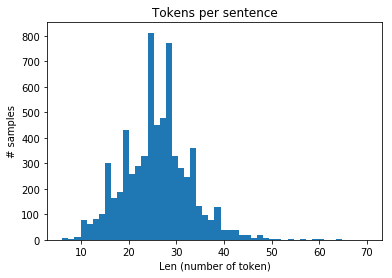

In [297]:
import re
import string
import os
import matplotlib
import matplotlib.pyplot as plot
from keras.preprocessing.text import Tokenizer

# Toeknize
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
# Plot 
plot.hist([len(tokenize(s)) for s in train['content'].values], bins=50)
plot.title('Tokens per sentence')
plot.xlabel('Len (number of token)')
plot.ylabel('# samples')
plot.show()

### Training Parameters (Hyper Parameters)
We'll set the following hyperparameters for training our model.
The above token per word plot, is used to determine the MAX_LEN which is according to plot is 22

In [337]:
# Number of examples used in each iteration
BATCH_SIZE = 32 
# Size of vocabulary dictionary
VOCAB_SIZE = 30000
# Max length of tweet as per the plot above
MAX_LEN = 22
# Dimension of word embedding vector
EMBEDDING_DIM = 40

### Preprocessing

Before using the data for the model, we need to preprocess the tweet content. For this purpose we will use Keras Tokenizer to convert each word into a corresponding integer identifier. In order for us to use the content in the Model we must ensure the length of the content is same. We can do this by using the Keras **sequence.pad_sequences** function. All content greater than MAX_LEN will be truncated and text which are less than MAX_LEN will be padded to get the same length

In [338]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import tensorflow as tf
import numpy as np

from tensorflow import set_random_seed
from numpy.random import seed

seed(1)
set_random_seed(2)

tweet_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tweet_tokenizer.fit_on_texts(train['content'].values)

x_train_seq = tweet_tokenizer.texts_to_sequences(train['content'].values)
x_test_seq = tweet_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_test = sequence.pad_sequences(x_test_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_test = train['label'].values, test['label'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
  rt <NAME/> <HASHTAG/> ictsi is profiting off exploiting workers , crippling communities and supporting dictatorships. <NAME/> is this a reputé 

First sample after preprocessing: 
 [  12    2    3 8151   11 5196   70 3085  233 8152 2576    8 3086 8153
    2   11   23    9 8154    0    0    0]


### Model Architecture
I have used a model based on Kim Yoon’s [Convolutional Neural Networks for Sentence Classification.](https://arxiv.org/abs/1408.5882)

![title](img/CNN_Architecture.png)

In [339]:
# CNN Model

NUM_FILTERS = 250
KERNEL_SIZE = 3
HIDDEN_DIMS = 250

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and use sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 22, 40)            1200000   
_________________________________________________________________
dropout_81 (Dropout)         (None, 22, 40)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 20, 250)           30250     
_________________________________________________________________
global_max_pooling1d_41 (Glo (None, 250)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_82 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_81 (Activation)   (None, 250)               0     

### Train and Evaluate

In [373]:
EPOCHS = 2 # Number of passes through entire dataset
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1)

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_test)

Train on 6012 samples, validate on 668 samples
Epoch 1/2
6012/6012 [==============================] - 4s 601us/step - loss: 0.0281 - acc: 0.9935 - val_loss: 0.8001 - val_acc: 0.7665
Epoch 2/2
1671/1671 [==============================] - 0s 87us/step

Accuracy:  77.91741472885752


### Test the Model we just trained

In [374]:
SENTIMENT_LABELS = ['negative', 'positive']
def predict(tweet):
    # Preprocessing step
    tweet_words_array = tweet_tokenizer.texts_to_sequences([tweet])
    tweet_words_array = sequence.pad_sequences(tweet_words_array, maxlen=MAX_LEN, padding="post", value=0)
    
    #Predict the sentiment label and score
    score = model.predict(tweet_words_array)[0][0]
    prediction = SENTIMENT_LABELS[model.predict_classes(tweet_words_array)[0][0]]
    print('Tweet:', tweet, '\nPrediction:', prediction, '\nScore: ', score)
    print('\n')

predict(". RT @SpryGuy: The CEO of Papa John's stiffs and cheats his own employees so he can live in this castle with a moat. NEVER buy Papa John's pi…")
predict(". GVC Holdings consummated the acquisition of Ladbrokes Coral https://t.co/xaN4ACA0h6 https://t.co/ZNm0gmXLK7")
predict(". family fully prepared to drop Roku, Apple iPhones , Amazon Prime, toss out Alexa,Google emails chromes, etc in the… https://t.co/64cZYuhYSQ")
predict(". #AtlasMara holding is a real ingenious feat in The financial fraternity..am amazed at the forge ahead they posses.. #mindblown")
predict(". Boeing hit hard by tariff and trade war headlines today, down -3.5%. Also note the very ugly price/momentum diverge https://t.co/h9bfT95yWZ")

Tweet: . RT @SpryGuy: The CEO of Papa John's stiffs and cheats his own employees so he can live in this castle with a moat. NEVER buy Papa John's pi… 
Prediction: negative 
Score:  0.14238462


Tweet: . GVC Holdings consummated the acquisition of Ladbrokes Coral https://t.co/xaN4ACA0h6 https://t.co/ZNm0gmXLK7 
Prediction: positive 
Score:  0.93925864


Tweet: . family fully prepared to drop Roku, Apple iPhones , Amazon Prime, toss out Alexa,Google emails chromes, etc in the… https://t.co/64cZYuhYSQ 
Prediction: negative 
Score:  0.00091955106


Tweet: . #AtlasMara holding is a real ingenious feat in The financial fraternity..am amazed at the forge ahead they posses.. #mindblown 
Prediction: positive 
Score:  0.99858224


Tweet: . Boeing hit hard by tariff and trade war headlines today, down -3.5%. Also note the very ugly price/momentum diverge https://t.co/h9bfT95yWZ 
Prediction: negative 
Score:  0.012769012




### Save Model

In [367]:
# Save model
model.save_weights('models/cnn_twitter_sentiment_weights.h5')